# imports

In [1]:
import anndata as ad
import scanpy as sc
import numpy as np
import seaborn as sns
import palettable
import pandas as pd
import scipy.io as sio
import pickle
import sys
import scipy
import matplotlib.pyplot as plt
sys.path.append('/home/yzy/bioSIMS/code/analysis')
# from utils_220 import *
# sc.set_figure_params(dpi=500, color_map='viridis')
sc.set_figure_params(dpi=500, color_map='viridis',dpi_save=500,transparent=True)

sc.settings.verbosity = 0
heatmap_cmp = palettable.cmocean.diverging.Balance_20.mpl_colormap

# %matplotlib inline


# functions

In [2]:
def plot_ME_cluster(adata,cls_idx):

    # 要展示一个MEcluster的平均ME
    pd_dict = {
        'type':[],
        'count':[],
    }
    ME_cluster = np.array(adata[adata.obs['leiden']==cls_idx].obsm['ME'])
    for i in range(ME_cluster.shape[0]):
        for j in range(ME_cluster.shape[1]):
            cur_val = ME_cluster[i,j]
            cur_type = ME_var_names_np[j]
            pd_dict['type'].append(cur_type)
            pd_dict['count'].append(cur_val)
    pd_df = pd.DataFrame(pd_dict)



    sns.set_style('white')
    fig,ax = plt.subplots(1,1,figsize=(10,3))
    # bar_y = adata[0].obsm['ME'][0,:]
    # bar_y=np.mean(adata[adata.obs['leiden']=='1'].obsm['ME'],axis=0)
    # bar_x = ME_var_names_np
    sns.barplot(x='type', y='count', data=pd_df,palette=a_R1.uns['type_colors'])
    plt.title('ME cluster {0}'.format(cls_idx))

In [53]:
def get_adata(st_file):
    st_path = '/home/yzy/PUBDT/st/Spatial_transcriptomics/Spatiotemporal_dynamics/count_matrices/'
#     st_file = 'CN51_C2_1_stdata_aligned_counts_IDs.txt'
    a_st = sc.read_csv(st_path+st_file,dtype='float32',delimiter='\t').transpose()
    a_st.var_names_make_unique()
    spatial_mat = np.zeros(shape=(a_st.shape[0],2))
    for i in range(a_st.obs_names.shape[0]):
        spatial_str = a_st.obs_names[i]
        cur_x,cur_y = spatial_str.split('_')
        spatial_mat[i,0] = cur_x
        spatial_mat[i,1] = cur_y
    spatial_mat = spatial_mat.astype('float32')
    a_st.obsm['spatial'] = spatial_mat
    return a_st

    

# data loading

In [51]:
st_path = '/home/yzy/PUBDT/st/Spatial_transcriptomics/Spatiotemporal_dynamics/count_matrices/'
st_file = 'CN51_C2_1_stdata_aligned_counts_IDs.txt'
a_st = sc.read_csv(st_path+st_file,dtype='float32',delimiter='\t').transpose()
a_st.var_names_make_unique()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [52]:
spatial_mat = np.zeros(shape=(a_st.shape[0],2))
for i in range(a_st.obs_names.shape[0]):
    spatial_str = a_st.obs_names[i]
    cur_x,cur_y = spatial_str.split('_')
    spatial_mat[i,0] = cur_x
    spatial_mat[i,1] = cur_y
spatial_mat = spatial_mat.astype('float32')
a_st.obsm['spatial'] = spatial_mat

    

In [54]:
st_file_list = ['CN51_C2_1_stdata_aligned_counts_IDs.txt','CN51_C2_2_stdata_aligned_counts_IDs.txt']
a_st_list = []
for st_file in st_file_list:
    cur_a = get_adata(st_file)
    a_st_list.append(cur_a)


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [57]:
a_st = a_st_list[0].concatenate(a_st_list[1])

In [60]:
a_st.var_names

Index(['Fam234a', 'Nefl', 'Sema5a', 'Tom1l2', 'Nbea', 'Mif', 'Pcsk1n',
       '2810021J22Rik', 'Tsfm', 'Zfp706',
       ...
       '__ambiguous.Gm5914.Agrp', 'Isoc2b', 'Gm26836', 'Fkbp11', 'Slc16a4',
       'Pgam2', 'Peg12', 'Snai1', 'Hist1h2an', 'Zbtb8a'],
      dtype='object', length=12572)

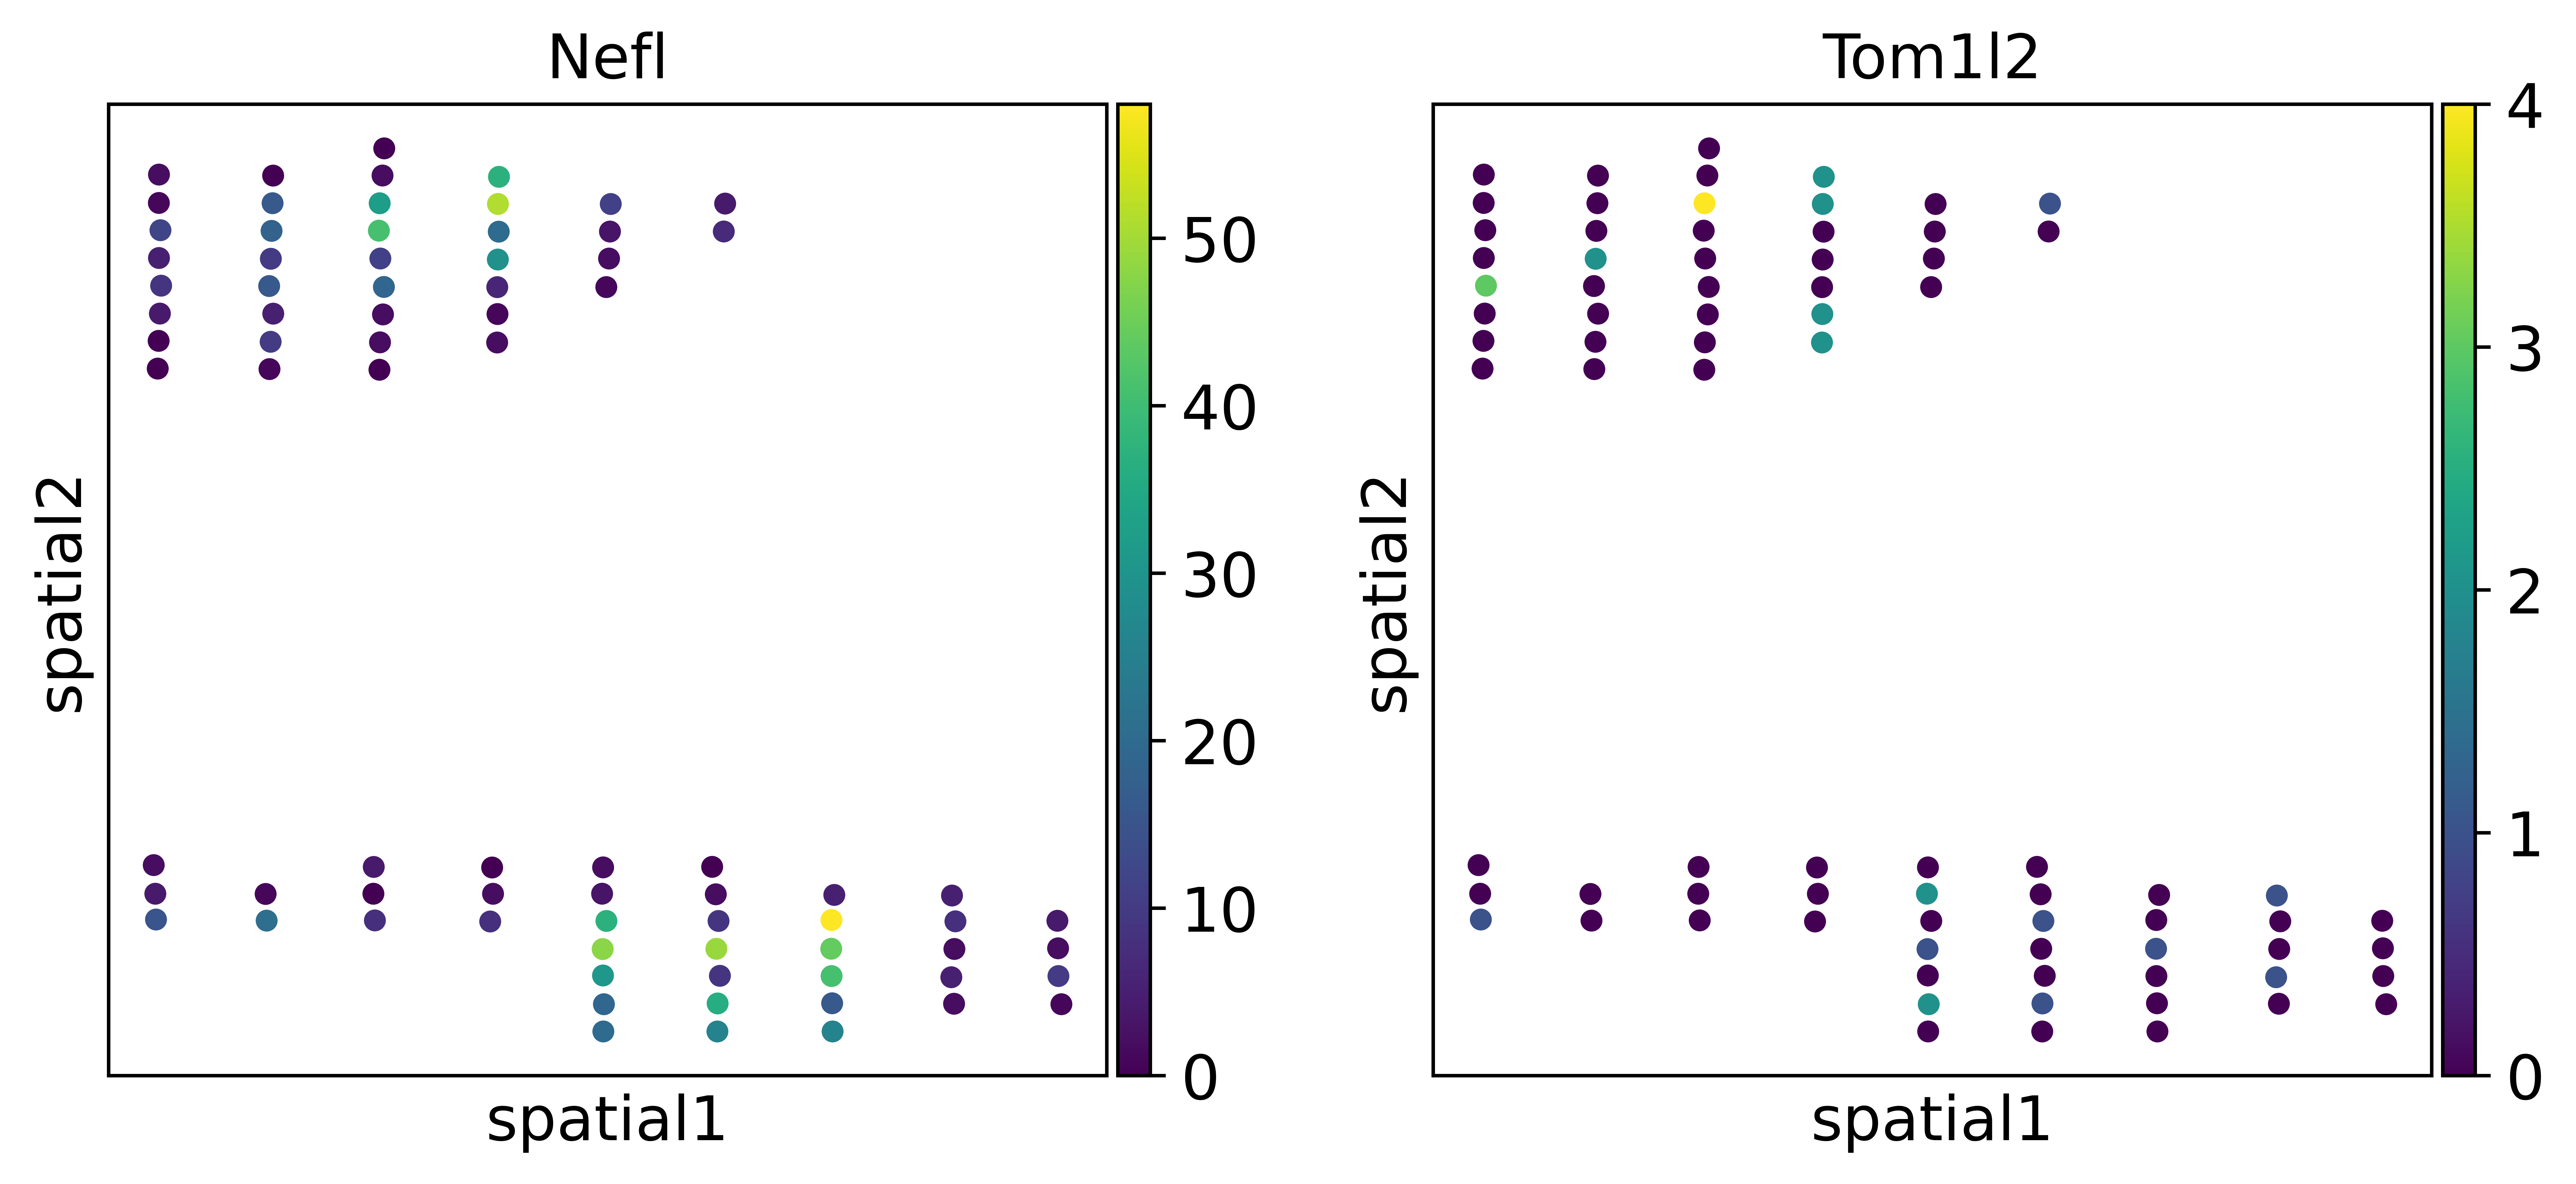

In [61]:
sc.pl.embedding(a_st,basis='spatial',color=['Nefl','Tom1l2'],ncols=2,s=100)